## Forest Fire Damage Prediction

### Understanding the Dataset

In [43]:
import pandas as pd

df=pd.read_csv('forestfires.csv')

In [44]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [45]:
# Rename columns for better clarity
df.rename(columns={
    'X': 'x_coord',
    'Y': 'y_coord',
    'month': 'month',
    'day': 'day',
    'FFMC': 'fine_fuel_moisture',
    'DMC': 'duff_moisture',
    'DC': 'drought_code',
    'ISI': 'initial_spread_index',
    'temp': 'temperature',
    'RH': 'relative_humidity',
    'wind': 'wind_speed',
    'rain': 'rainfall',
    'area': 'burned_area'
}, inplace=True)


In [46]:
# Display the updated column names
df.head()

,x_coord,y_coord,month,day,fine_fuel_moisture,duff_moisture,drought_code,initial_spread_index,temperature,relative_humidity,wind_speed,rainfall,burned_area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0



1. FFMC (Fine Fuel Moisture Code): Measures the moisture content in the surface litter, influencing how easily a fire can start.

2. DMC (Duff Moisture Code): Indicates the moisture in medium-depth organic material, affecting how deeply a fire can spread.

3. DC (Drought Code): Measures long-term drying in deep organic layers, showing how difficult it is to suppress a fire.

4. ISI (Initial Spread Index): Estimates the initial spread rate of a fire given wind and fine fuel moisture.

5. temp: Temperature in Celsius, influencing fire ignition and spread.

6. RH (Relative Humidity): Percentage of moisture in the air.

7. wind: Wind speed in km/h, impacting fire spread.

8. rain: Rainfall in mm/m², potentially reducing fire spread.

9. area: Burned area (target variable) in hectares.

In [47]:
df.isna().sum()

x_coord                 0
y_coord                 0
month                   0
day                     0
fine_fuel_moisture      0
duff_moisture           0
drought_code            0
initial_spread_index    0
temperature             0
relative_humidity       0
wind_speed              0
rainfall                0
burned_area             0
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   x_coord               517 non-null    int64  
 1   y_coord               517 non-null    int64  
 2   month                 517 non-null    object 
 3   day                   517 non-null    object 
 4   fine_fuel_moisture    517 non-null    float64
 5   duff_moisture         517 non-null    float64
 6   drought_code          517 non-null    float64
 7   initial_spread_index  517 non-null    float64
 8   temperature           517 non-null    float64
 9   relative_humidity     517 non-null    int64  
 10  wind_speed            517 non-null    float64
 11  rainfall              517 non-null    float64
 12  burned_area           517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


No missing values

In [49]:
df.duplicated().sum()

4

In [50]:
df.drop_duplicates()

,x_coord,y_coord,month,day,fine_fuel_moisture,duff_moisture,drought_code,initial_spread_index,temperature,relative_humidity,wind_speed,rainfall,burned_area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


### Code Implementation for Preprocessing and Analysis

In [52]:
# Convert 'month' and 'day' to numerical values
df['month'] = df['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
df['day'] = df['day'].map({'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7})


In [53]:
# Standardize numerical features (excluding target 'burned_area')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = ['x_coord', 'y_coord', 'fine_fuel_moisture', 'duff_moisture', 
            'drought_code', 'initial_spread_index', 'temperature', 
            'relative_humidity', 'wind_speed', 'rainfall']
df[features] = scaler.fit_transform(df[features])

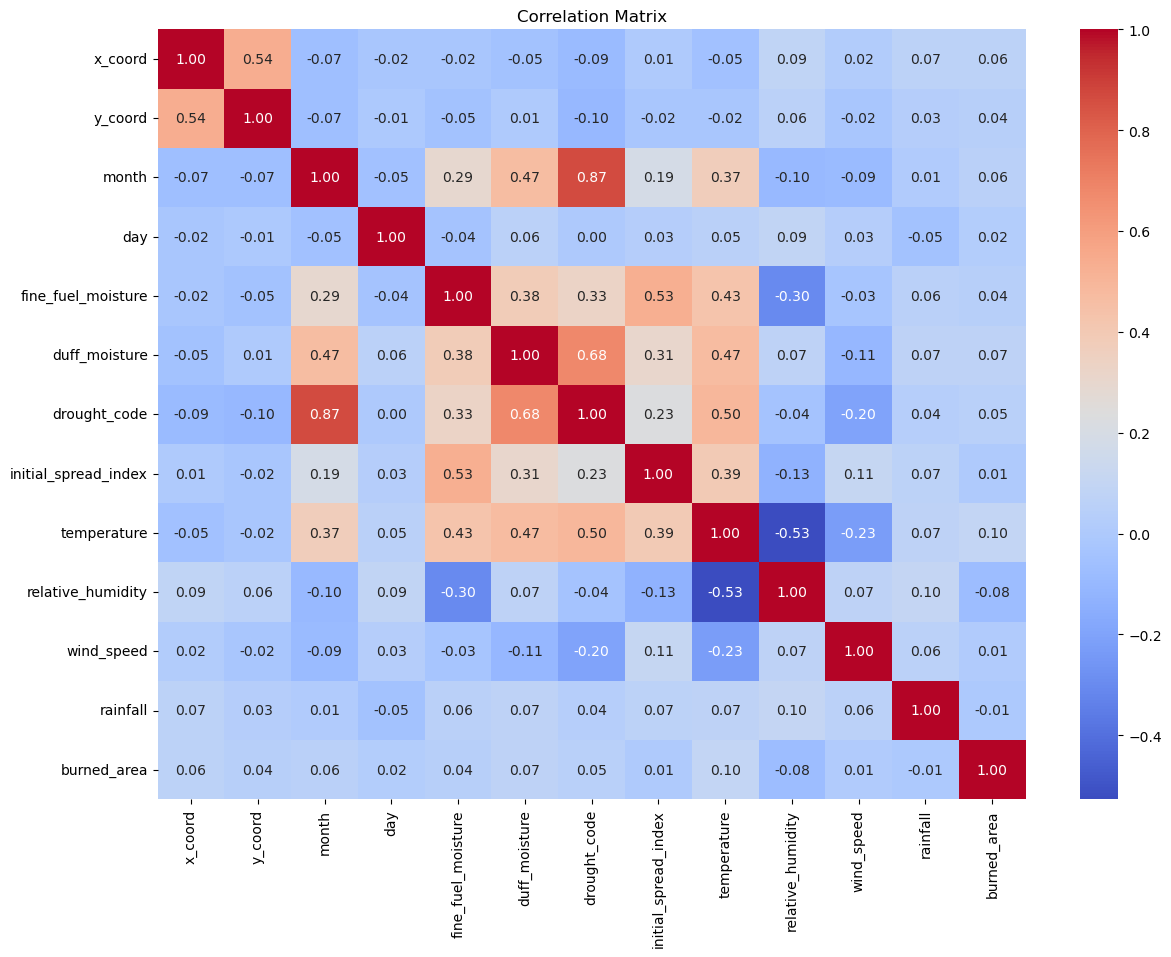

In [54]:
# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

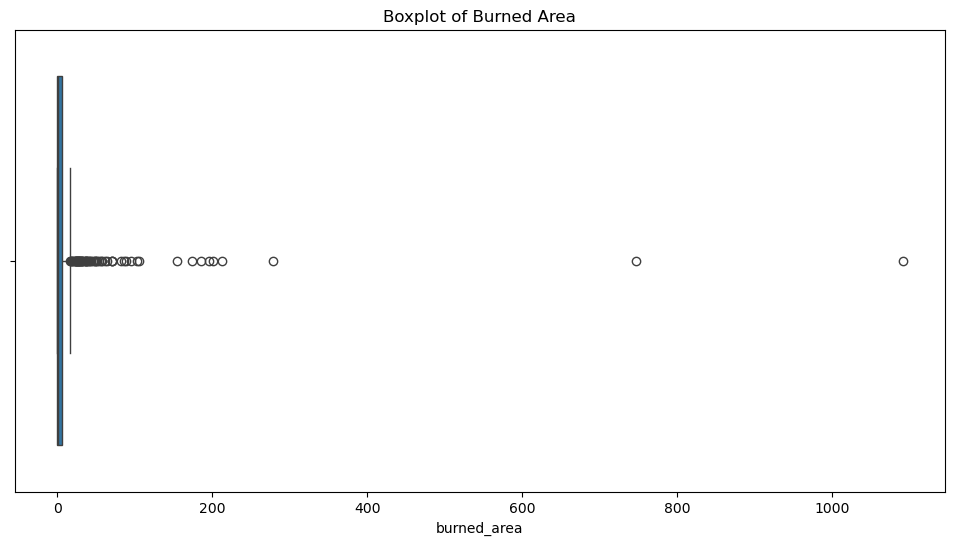

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualize outliers using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['burned_area'])
plt.title('Boxplot of Burned Area')
plt.show()


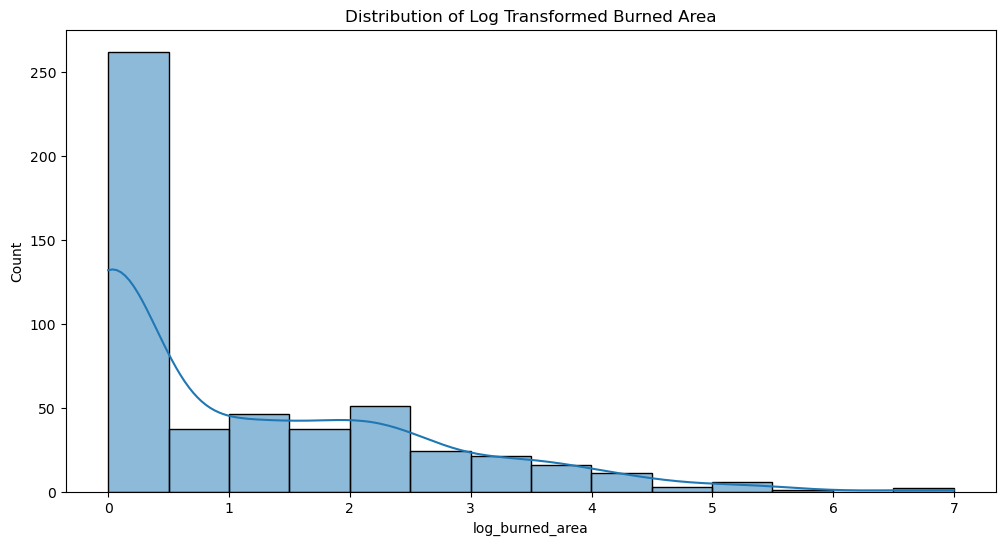

In [56]:
# Apply log transformation to reduce skewness
df['log_burned_area'] = np.log1p(df['burned_area'])

# Visualize the transformed column
plt.figure(figsize=(12, 6))
sns.histplot(df['log_burned_area'], kde=True)
plt.title('Distribution of Log Transformed Burned Area')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

#### Inferential Analysis

Perform hypothesis testing to see if specific features have a significant relationship with the burned_area.

1. Null Hypothesis (H0): The feature (temperature) does not significantly affect the burned_area.

2. Alternative Hypothesis (H1): The feature (temperature) significantly affects the burned_area.

In [57]:
from scipy.stats import pearsonr

# Correlation with 'burned_area'
for feature in features:
    corr, p_value = pearsonr(df[feature], df['log_burned_area'])
    print(f"Feature: {feature}, Correlation: {corr:.2f}, P-value: {p_value:.3f}")


Feature: x_coord, Correlation: 0.06, P-value: 0.159
Feature: y_coord, Correlation: 0.04, P-value: 0.378
Feature: fine_fuel_moisture, Correlation: 0.05, P-value: 0.288
Feature: duff_moisture, Correlation: 0.07, P-value: 0.127
Feature: drought_code, Correlation: 0.07, P-value: 0.132
Feature: initial_spread_index, Correlation: -0.01, P-value: 0.814
Feature: temperature, Correlation: 0.05, P-value: 0.225
Feature: relative_humidity, Correlation: -0.05, P-value: 0.223
Feature: wind_speed, Correlation: 0.07, P-value: 0.128
Feature: rainfall, Correlation: 0.02, P-value: 0.597


Looks like there is no siginificant variables affecting log burned area

In [58]:
from scipy.stats import pearsonr

# Correlation with 'burned_area'
for feature in features:
    corr, p_value = pearsonr(df[feature], df['burned_area'])
    print(f"Feature: {feature}, Correlation: {corr:.2f}, P-value: {p_value:.3f}")


Feature: x_coord, Correlation: 0.06, P-value: 0.150
Feature: y_coord, Correlation: 0.04, P-value: 0.309
Feature: fine_fuel_moisture, Correlation: 0.04, P-value: 0.363
Feature: duff_moisture, Correlation: 0.07, P-value: 0.097
Feature: drought_code, Correlation: 0.05, P-value: 0.262
Feature: initial_spread_index, Correlation: 0.01, P-value: 0.851
Feature: temperature, Correlation: 0.10, P-value: 0.026
Feature: relative_humidity, Correlation: -0.08, P-value: 0.086
Feature: wind_speed, Correlation: 0.01, P-value: 0.780
Feature: rainfall, Correlation: -0.01, P-value: 0.867


In [61]:
import statsmodels.api as sm

# Create interaction term between temperature and wind speed
df['temp_wind_interaction'] = df['temperature'] * df['wind_speed']

# Fit a new regression model with the interaction term
X_interaction = sm.add_constant(df[['temperature', 'wind_speed', 'temp_wind_interaction']])
interaction_model = sm.OLS(df['log_burned_area'], X_interaction).fit()

# Summary of the interaction model
print(interaction_model.summary())


                            OLS Regression Results                            
Dep. Variable:        log_burned_area   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     3.627
Date:                Wed, 06 Nov 2024   Prob (F-statistic):             0.0130
Time:                        11:53:42   Log-Likelihood:                -901.04
No. Observations:                 517   AIC:                             1810.
Df Residuals:                     513   BIC:                             1827.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.07

The interaction between temperature and wind speed significantly impacts the log-transformed burned area, but the model's overall explanatory power is low. Residuals show non-normality and autocorrelation, indicating the need for model refinement and additional predictors.

In [63]:
# Fit a regression model without the interaction term
X = sm.add_constant(df[['temperature', 'wind_speed']])
model = sm.OLS(df['log_burned_area'], X).fit()

# Compare two models (e.g., with and without interaction term)
anova_results = anova_lm(model, interaction_model)
print(anova_results)


   df_resid         ssr  df_diff    ss_diff         F    Pr(>F)
0     514.0  999.553978      0.0        NaN       NaN       NaN
1     513.0  988.139720      1.0  11.414258  5.925796  0.015261



##### Interpretation of ANOVA Results

The ANOVA results compare two regression models: one with an interaction term between temperature and wind speed, and one without it. 

##### Conclusion

The p-value (0.015261) is less than the common significance level of 0.05, indicating that the interaction term between temperature and wind speed significantly improves the model. Therefore, we reject the null hypothesis that the interaction term does not provide additional explanatory power for the burned area.
```

### Modeling

In [65]:
from sklearn.model_selection import train_test_split

# Drop original columns that have been transformed or encoded
X = df.drop(['burned_area', 'log_burned_area'], axis=1)
y = df['log_burned_area']  # Using log-transformed target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


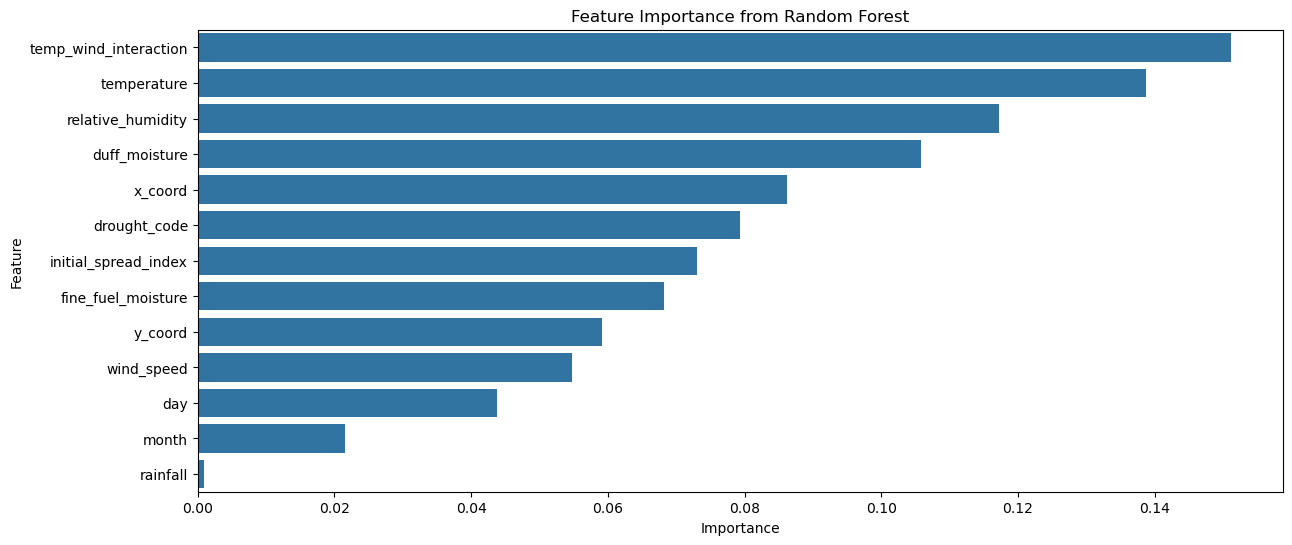

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Fit a RandomForestRegressor to select important features
selector = RandomForestRegressor(n_estimators=100, random_state=42)
selector.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': selector.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(14, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance from Random Forest')
plt.show()


#### Random Forest

Mean Squared Error: 2.2498127062769067
R-squared Score: -0.023637127340314423


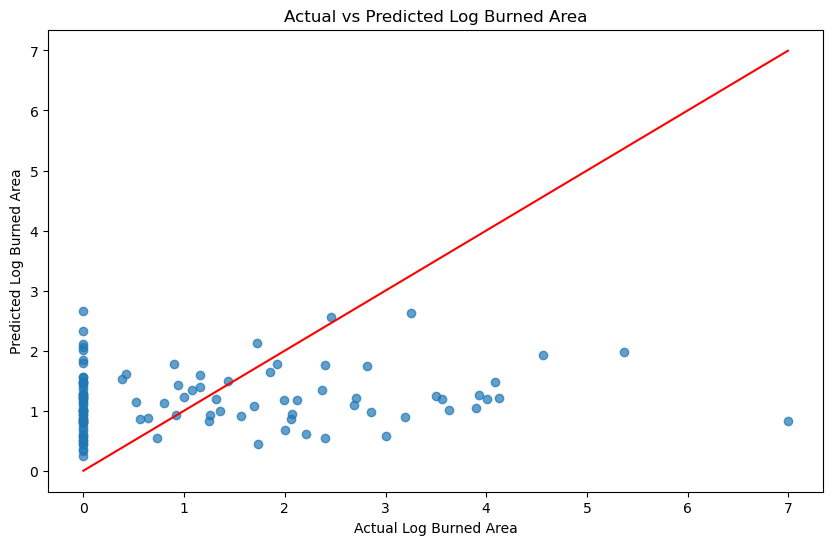

In [68]:
from sklearn.metrics import mean_squared_error, r2_score

# Train a regression model (e.g., Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Since this is a regression problem, confusion matrix and accuracy score are not applicable.
# Instead, we can visualize the actual vs predicted values.

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Log Burned Area')
plt.ylabel('Predicted Log Burned Area')
plt.title('Actual vs Predicted Log Burned Area')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.show()


The model, likely a Random Forest Regressor, may not be effectively capturing non-linear relationships or interactions between features.
Possible imbalance in the target variable, where a large number of observations have small burned_area values, leading to difficulty in predicting larger areas accurately.

Mean Squared Error: 2.146184459243545
R-squared Score: 0.02351245129287116


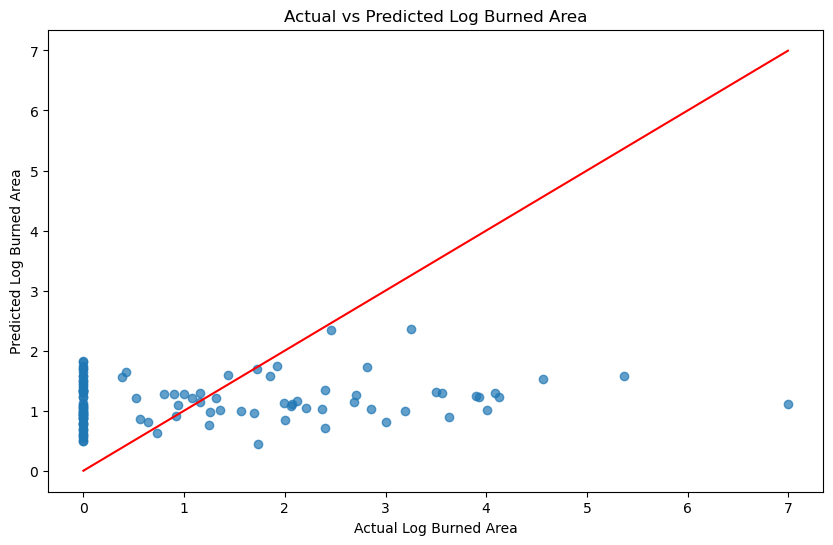

In [75]:
# Predict on the test set
y_pred = random_search.predict(X_test)

# Evaluate the model using mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Log Burned Area')
plt.ylabel('Predicted Log Burned Area')
plt.title('Actual vs Predicted Log Burned Area')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.show()


## Need more hyperparameter tuning for Random Forest